# 7. Feature Selection

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./dataset/train_ts_feature_added_2.csv')
df_train['datetime_iso'] = pd.to_datetime(df_train['datetime_iso'])

df_test = pd.read_csv('./dataset/test_ts_feature_added_2.csv')
df_test['datetime_iso'] = pd.to_datetime(df_test['datetime_iso'])

In [3]:
df_train = df_train.drop(['datetime_iso'],axis = 1)
df_test = df_test.drop(['datetime_iso'],axis = 1)

## Correlation Analysis

/tmp/ipykernel_6124/2202451030.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


<Figure size 1200x800 with 0 Axes>

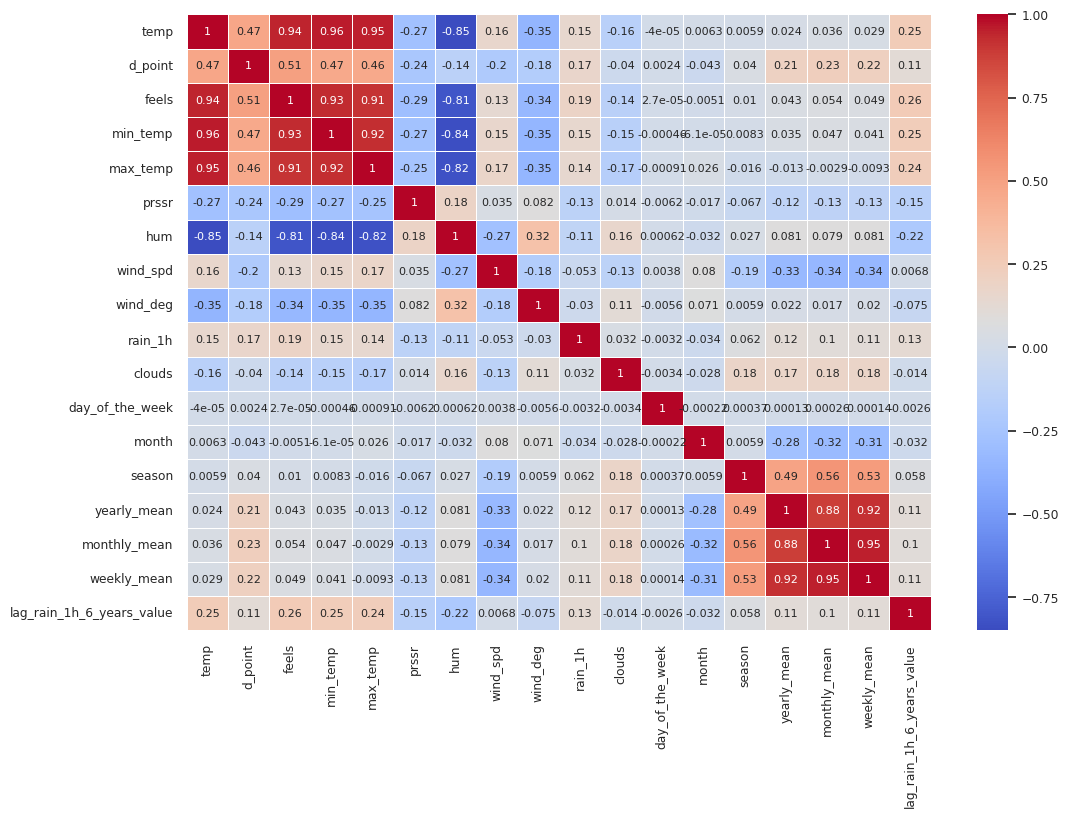

In [4]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))

# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Customize the heatmap appearance and font size
sns.set(font_scale=0.8)  # Adjust the font scale as needed
sns.set_style("whitegrid")

# Create the heatmap with smaller annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 8})  # Adjust the "size" parameter for the font size

# Show the plot
plt.show()

### Coba drop day_of_the_week deh

In [5]:
df_train.head()

,temp,d_point,feels,min_temp,max_temp,prssr,hum,wind_spd,wind_deg,rain_1h,clouds,day_of_the_week,month,season,yearly_mean,monthly_mean,weekly_mean,lag_rain_1h_6_years_date,lag_rain_1h_6_years_value
0,24.95,23.56,25.90,24.59,25.30,1011.0,92.0,1.55,326.0,0.00,100.0,1,1,1,0.492286,0.442561,0.485107,1979-01-01 00:00:00+00:00,0.00
1,25.62,23.48,26.54,25.28,25.96,1011.0,88.0,1.20,314.0,0.11,98.0,1,1,1,0.492286,0.442561,0.485107,1979-01-01 01:00:00+00:00,0.00
2,28.09,24.10,32.17,27.74,28.43,1011.0,79.0,0.99,280.0,0.10,100.0,1,1,1,0.492286,0.442561,0.485107,1979-01-01 02:00:00+00:00,0.00
3,26.20,23.83,33.33,28.39,29.53,1011.0,74.0,1.04,268.0,0.13,100.0,1,1,1,0.492286,0.442561,0.485107,1979-01-01 03:00:00+00:00,0.13
4,29.68,23.62,34.27,28.86,30.53,1009.0,70.0,1.50,248.0,0.33,100.0,1,1,1,0.492286,0.442561,0.485107,1979-01-01 04:00:00+00:00,0.34


In [6]:
df_train_dotw = df_train.drop(['day_of_the_week','lag_rain_1h_6_years_date'],axis = 1)
df_test_dotw = df_train.drop(['day_of_the_week','lag_rain_1h_6_years_date'],axis = 1)

In [7]:
from pycaret.regression import *
s = setup(df_train_dotw, target = 'rain_1h', session_id = 42)

,Description,Value
0,Session id,42
1,Target,rain_1h
2,Target type,Regression
3,Original data shape,"(289272, 17)"
4,Transformed data shape,"(289272, 17)"
5,Transformed train set shape,"(202490, 17)"
6,Transformed test set shape,"(86782, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [ ]:
catboost = create_model('catboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:11:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Regressor


Processing:   0%|          | 0/4 [00:00<?, ?it/s]